# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

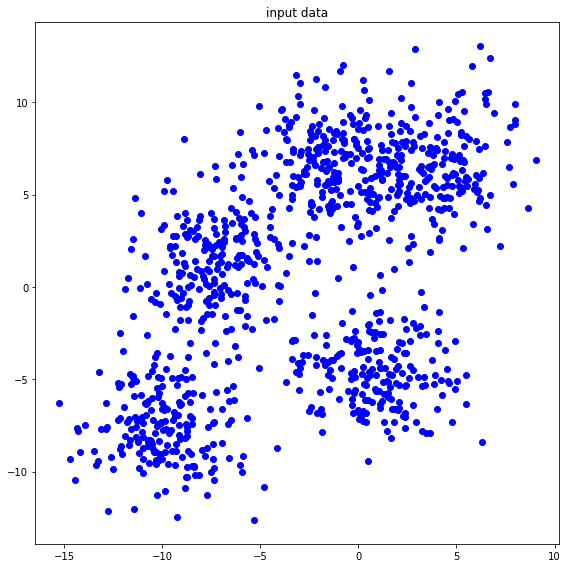

In [3]:

def plot_data(feature):
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    x = feature[:,0]
    y = feature[:,1]
    
    plt.scatter(x,y,color='blue')
    
    plt.tight_layout()
    plt.show()
    
plot_data(feature)

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):

    dis_k = np.square(feature-center)
    dis_k=np.sum(dis_k,axis=1) 
    return dis_k

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, value_label):
    indexs = np.where(label_feature==value_label) 
    cluster = feature[indexs] 

    centroid = np.mean(cluster,axis=0) 
    
    return  centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [9]:
def compute_label(distance):
    index_label_feature= np.argmin(distance,axis=0)
    
    return index_label_feature


In [32]:
number_cluster_5      = 5
number_iteration_5    = 15
distance_5            = np.zeros(shape=(number_cluster_5,number_data))
centroid_5            = np.zeros(shape=(number_cluster_5, number_feature))

label_5 = np.zeros(number_data)
loss_iteration_5     = np.zeros(shape=(number_iteration_5, 1))
centroid_iteration_5  = np.zeros(shape=(number_iteration_5, number_cluster_5, number_feature))

np.random.seed(76923)
random = np.random.choice(number_data,number_cluster_5,replace=False)
centroid_5 = feature[random]

for i in range(number_iteration_5):

    for k in range(number_cluster_5):
        distance_5[k] = compute_distance(feature,centroid_5[k])
    label = compute_label(distance_5)
    
    s2=0
    for j in range(number_cluster_5):
        cluster_k=feature[np.where(label == j)]
        k_distance_5=compute_distance(cluster_k,centroid_5[j])
        s1=np.sum(k_distance_5)
        s2=s2+s1
        arith_avg= np.mean(cluster_k,axis=0) 
        centroid_5[j]=arith_avg
    loss=s2/number_data
    loss_iteration_5[i]=loss
    
    centroid_iteration_5[i]=centroid_5
    
    print("loss[%4d] :"%i, loss)

    label_5 = label

loss[   0] : 43.381768645257935
loss[   1] : 12.30192962773284
loss[   2] : 8.625190142259548
loss[   3] : 7.926251265105621
loss[   4] : 7.787845556619279
loss[   5] : 7.713931173372232
loss[   6] : 7.6931426167093795
loss[   7] : 7.68462844706565
loss[   8] : 7.6839496075382305
loss[   9] : 7.6835403642446325
loss[  10] : 7.680540434584911
loss[  11] : 7.678349929025251
loss[  12] : 7.67764397219576
loss[  13] : 7.67764397219576
loss[  14] : 7.67764397219576


In [42]:
number_cluster_10      = 10
number_iteration_10    = 35
distance_10            = np.zeros(shape=(number_cluster_10,number_data))
centroid_10            = np.zeros(shape=(number_cluster_10, number_feature))

label_10 = np.zeros(number_data)
loss_iteration_10     = np.zeros(shape=(number_iteration_10, 1))

centroid_iteration_10  = np.zeros(shape=(number_iteration_10, number_cluster_10, number_feature))

np.random.seed(76923)
random=np.random.choice(number_data,number_cluster_10,replace=False)
centroid_10=feature[random]

for i in range(number_iteration_10):

    for k in range(number_cluster_10):
        distance_10[k] = compute_distance(feature,centroid_10[k])
    label = compute_label(distance_10)
    
    s2=0
    for j in range(number_cluster_10):
        cluster_k=feature[np.where(label == j)]
        k_distance_10=compute_distance(cluster_k,centroid_10[j])
        s1=np.sum(k_distance_10)
        s2=s2+s1
        arith_avg= np.mean(cluster_k,axis=0) 
        centroid_10[j]=arith_avg
    loss=s2/number_data
    loss_iteration_10[i]=loss
    
    centroid_iteration_10[i]=centroid_10
    
    print("loss[%4d] :"%i, loss)

    label_10 = label

loss[   0] : 9.173194538732936
loss[   1] : 5.74242119880059
loss[   2] : 5.575887292967325
loss[   3] : 5.526410950512529
loss[   4] : 5.492797384528855
loss[   5] : 5.479408704362819
loss[   6] : 5.473332952249844
loss[   7] : 5.470548634673598
loss[   8] : 5.464793948946309
loss[   9] : 5.447742166678725
loss[  10] : 5.425831877165541
loss[  11] : 5.39505412023835
loss[  12] : 5.35584883563087
loss[  13] : 5.306155756395429
loss[  14] : 5.229630379267752
loss[  15] : 5.179168117876592
loss[  16] : 5.103036931591183
loss[  17] : 5.011253293580371
loss[  18] : 4.951444695530548
loss[  19] : 4.923614132216735
loss[  20] : 4.912539972134275
loss[  21] : 4.900757041312258
loss[  22] : 4.885441664561838
loss[  23] : 4.871496992401843
loss[  24] : 4.864186448931007
loss[  25] : 4.8608078076172365
loss[  26] : 4.8565872108040375
loss[  27] : 4.855113553218838
loss[  28] : 4.854791969306683
loss[  29] : 4.854673170194368
loss[  30] : 4.854673170194368
loss[  31] : 4.854673170194368
loss[  32

## plot the results

In [34]:
# 위에 작성함

In [35]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    iter_num = len(loss_iteration)
    iteration_num = []
    for i in range(0, iter_num) :
        iteration_num.append(i)
        
    plt.plot(iteration_num, loss_iteration, '-', color = 'red')

    plt.tight_layout()
    plt.show()

In [51]:

def plot_centroid(centroid_iteration, cluster_num):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    iteration_num = []
    x = []
    y = []
    xx = []
    yy = []
    print(len(centroid_iteration))
    for i in range(0, len(centroid_iteration)) :
        iteration_num.append(i)
        
    for i in range(0, cluster_num) :
        for j in range(0, np.shape(centroid_iteration)[0]):
            xx.append(centroid_iteration[j][i][0])
            yy.append(centroid_iteration[j][i][1])
        x.append(xx)
        y.append(yy)
        xx = []
        yy = []
        
    x = np.array(x)
    y = np.array(y)
    
    for i in range(0, cluster_num) :
        plt.plot(x, y, '-', label = 'cluster={}'.format(i))
        plt.legend()
    legend_flag = 0
    
    for i in range(0, cluster_num):
        plt.plot(centroid_iteration[0][i][0],centroid_iteration[0][i][1], 'o',color='blue',label='initial')
        plt.plot(centroid_iteration[-1][i][0],centroid_iteration[-1][i][1], 's',color='red',label='final')
        if legend_flag==0:
            plt.legend()
            legend_flag=1
        
    plt.tight_layout()
    plt.show()

In [96]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

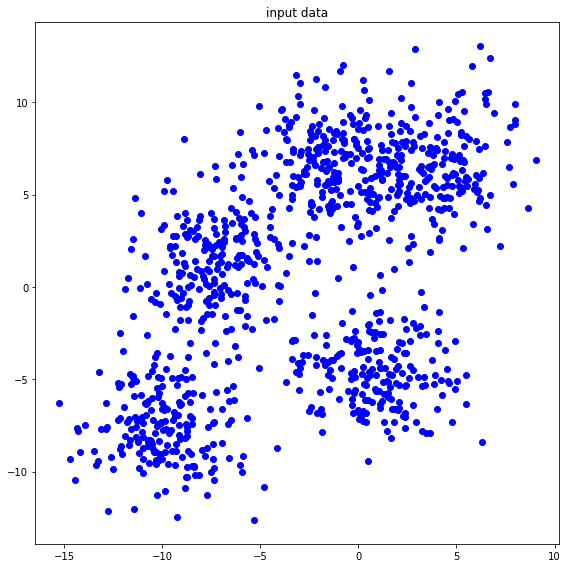

In [36]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

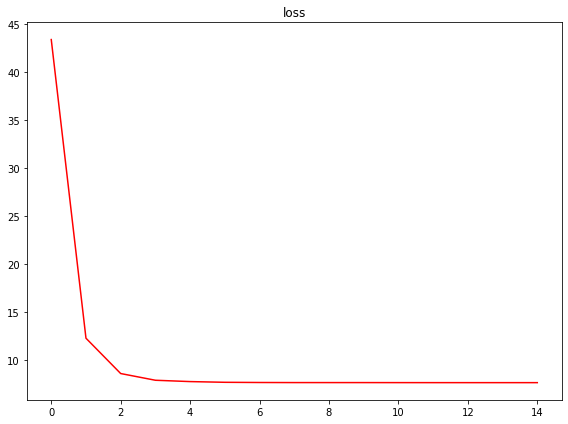

In [37]:
plot_loss_curve(loss_iteration_5)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

15


<ipython-input-51-69c43a901321>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


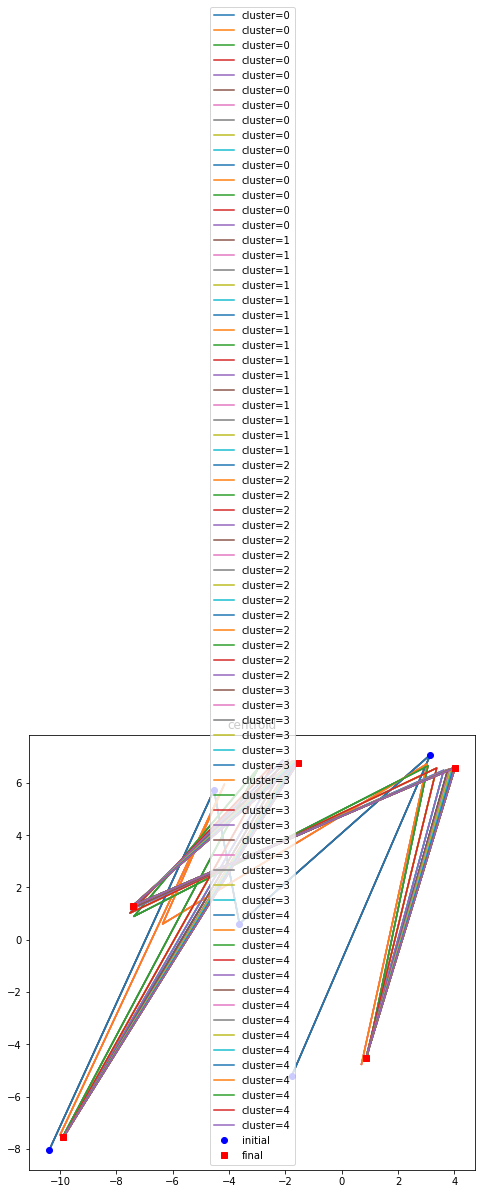

In [52]:
plot_centroid(centroid_iteration_5, number_cluster_5)

***

4. plot the final clustering result with the number of clusters being 5

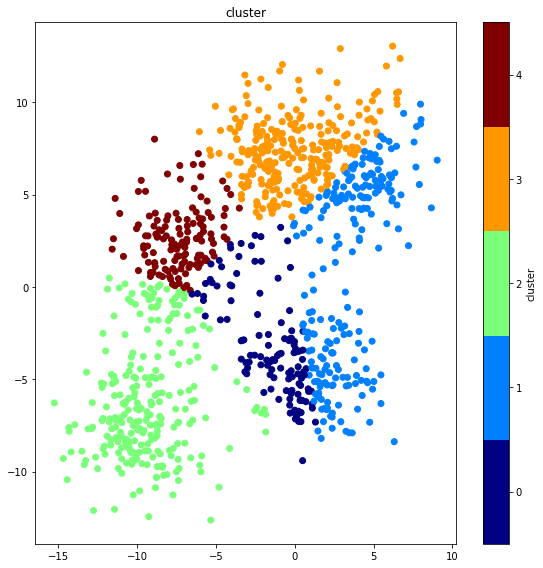

In [90]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

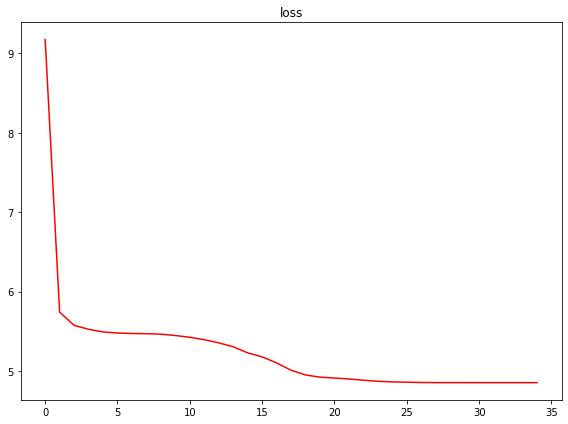

In [43]:
plot_loss_curve(loss_iteration_10)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

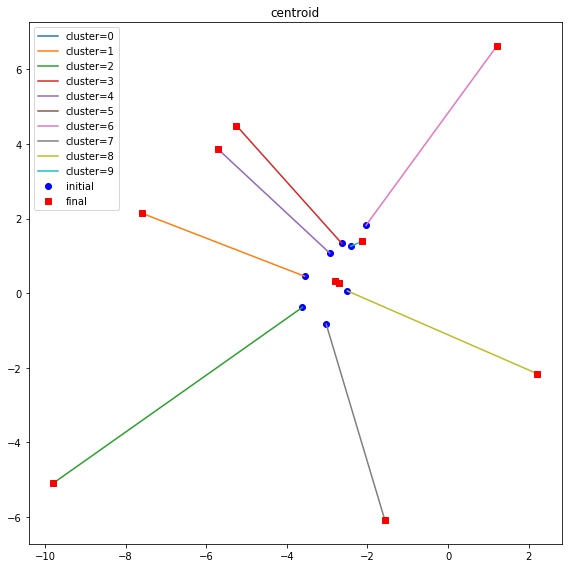

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

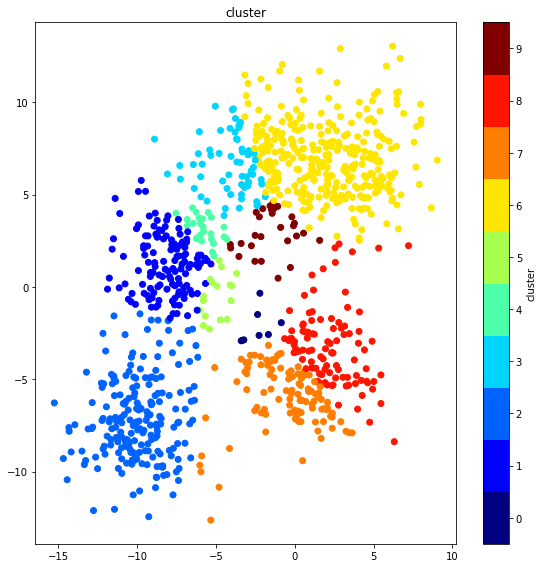

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***